***
<pre>                                                 <i> Linear Regression <i></pre>
***
</div>
    <img src="INSEA_logo.png"  style="height: 80px;: 20px;">
</div>

<div style="background-color: green">
<h1 align="center"> Multiple Linear Regression  </h1>
</div>

<pre align='left'>  18/04/2025                                                                                         <i> Author: DAOUDI Adam </i></pre>


____________________________________________________________________________________________________________________________________________________________

#### objectifs :
- Read the Data

- Exploratory Data Analysis

- Encoding of the Categorical Variables

- Regression with statsmodel

- sklearn Regression Pipelines

### Importing Libreries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Datset

In [71]:
StudentsPerformance = pd.read_csv("StudentsPerformance[1].csv")

StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Vis

In [72]:
print(f'-StudentsPerformance shape is {StudentsPerformance.shape}\n')
print(f'- The data set columns are {StudentsPerformance.dtypes}\n')
print(f'- The datasest has {StudentsPerformance.isnull().sum().max()} null values \n')
print(f'- The datset has {StudentsPerformance.duplicated().sum()} duplicated rows\n')

-StudentsPerformance shape is (1000, 8)

- The data set columns are gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- The datasest has 0 null values 

- The datset has 0 duplicated rows



In [73]:
StudentsPerformance.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [74]:
StudentsPerformance.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

## Data Analysis

### categorical Variables

In [75]:
cat_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype == 'object']
print(f'Categorical columns in the dataframe are: {cat_cols}', end='')
print('\n')
num_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype != 'object']
print(f'numerical columns in the dataframe are: {num_cols}', end='')


Categorical columns in the dataframe are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

numerical columns in the dataframe are: ['math score', 'reading score', 'writing score']

Text(0.5, 1.0, 'Parental level of education VS Ethnicity')

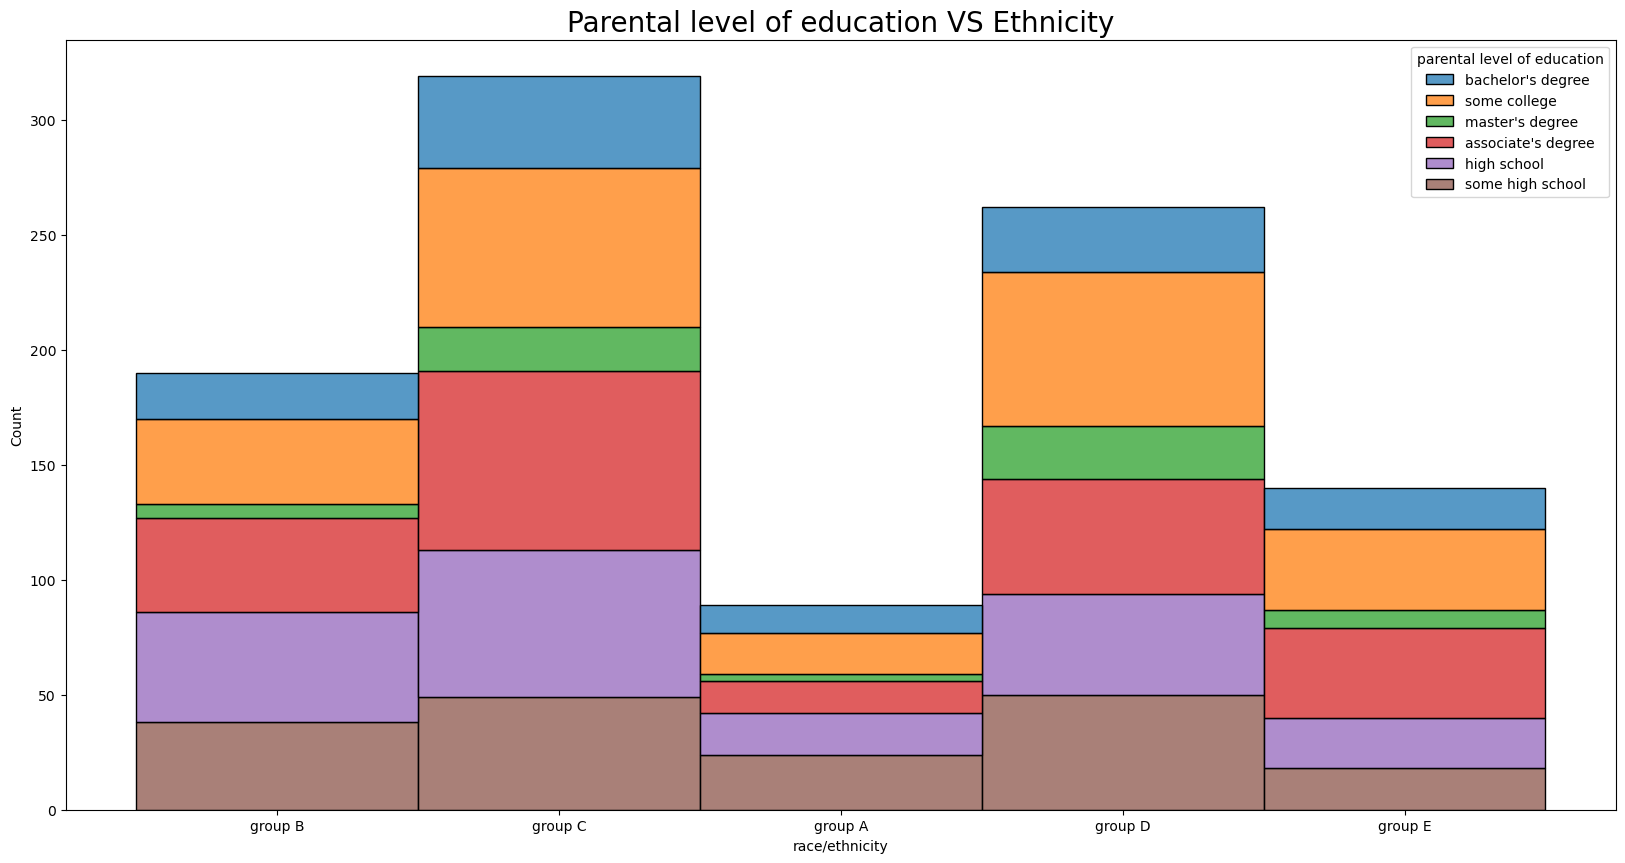

In [76]:
plt.figure(figsize=(20, 10))
sns.histplot(data=StudentsPerformance, x='race/ethnicity', hue='parental level of education', multiple='stack')
plt.title('Parental level of education VS Ethnicity', size=20)

### Numerical Values

In [77]:
num_cols

['math score', 'reading score', 'writing score']

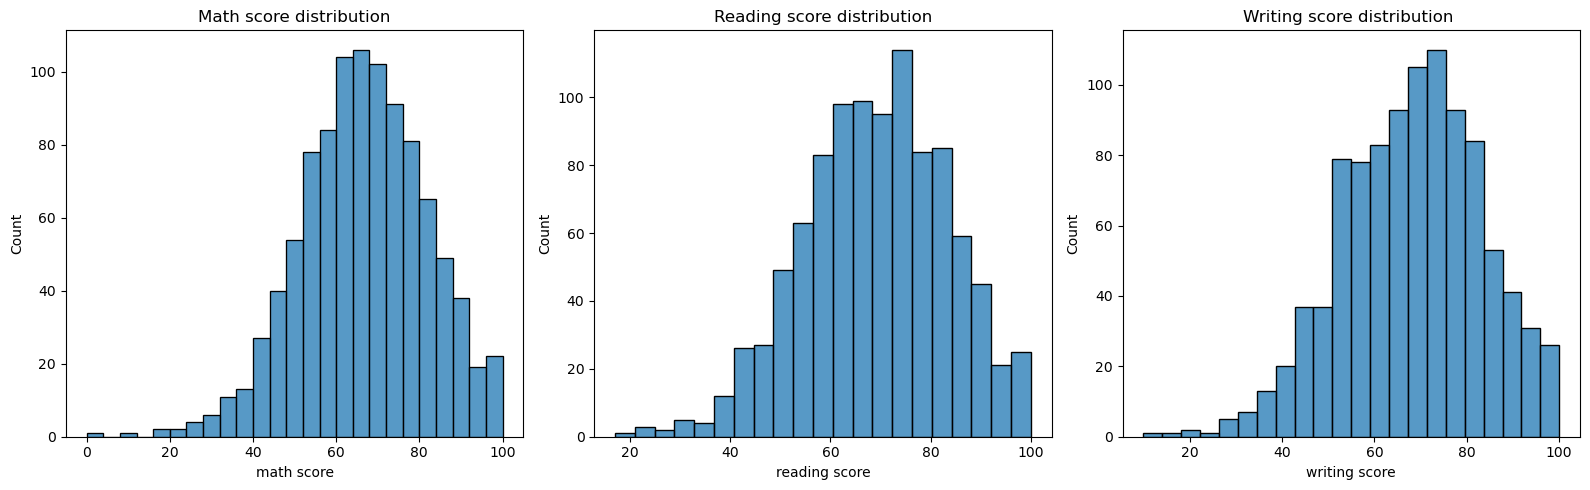

In [78]:
fig , (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(16,5))

ax1=sns.histplot(data=StudentsPerformance, x='math score', ax=ax1)
ax1.set_title('Math score distribution', size=12)

ax2=sns.histplot(data=StudentsPerformance, x='reading score', ax=ax2)
ax2.set_title('Reading score distribution', size=12)

ax3= sns.histplot(data=StudentsPerformance, x='writing score', ax=ax3)
ax3.set_title('Writing score distribution ', size=12)


plt.tight_layout()